<a href="https://colab.research.google.com/github/andheartsjaz/Data-Science-Thinkful-PairProgramming-Lectures/blob/master/PairProgramming_DimensionalityReduction_53_1_nonlinear_kpca_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nonlinear Dimensionality Reduction

Jay Urbain, PhD

#### Objectives:    
-Students can explain commonly used nonlinear manifold learning techniques: kernel PCA, Isomap, LLE, and variants of LLE (e.g. MLLE)

-Students can explain the differences between these techniques

-Students can connect kernel PCA to classical (linear) PCA and understand how the former is a generalization of the latter

-Students can apply these techniques to a dataset

#### References

1. Ali Ghodsi, Dimensionality ReductionA Short Tutorial, 2006.   
https://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/readings/tutorial_stat890.pdf

2. Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models.     
http://arxiv.org/abs/1207.3538

3. Q. Wang. Kernel principal component analysis and its applications in face recognition and active shape models. CoRR, abs/1207.3538, 2012.

4. B. Scholkopf, A. Smola, and K.-R. Muller. Kernel principal component analysis. pages 583–588, 1997.

5. B. Scholkopf, A. Smola, and K.-R. Muller. Nonlinear component analysis as a kernel eigenvalue problem. Neural computation, 10(5):1299–1319, 1998.

6. S. T. Roweis and L. K. Saul. Nonlinear dimensionality reduction by locally linear embedding. Science, 290(5500):2323–2326, 2000.

7. Sebastian Raschka, Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA    
https://sebastianraschka.com/Articles/2014_kernel_pca.html

8. Wikipedia - Kernel PCA  
https://en.wikipedia.org/wiki/Kernel_principal_component_analysis

9. Lecture - Kernel PCA   
http://fourier.eng.hmc.edu/e161/lectures/kernelPCA/node4.html

10. ML | Introduction to Kernel PCA  
https://www.geeksforgeeks.org/ml-introduction-to-kernel-pca/

11. Rita Osadchy, Lecture: Kernel PCA
http://www.cs.haifa.ac.il/~rita/uml_course/lectures/KPCA.pdf

12. Vanderplas et al, AstroML: Machine Learning and Data Mining for Astronomy, 2012.         
http://www.astroml.org/

13. Jake VanderPlas, Python Data Science Handbook  
https://jakevdp.github.io/PythonDataScienceHandbook/



### Scikit-learn RBF Kernel PCA

There is an implementation of `KernelPCA` in Scikit-learn. 

Generate non-linear dataset.

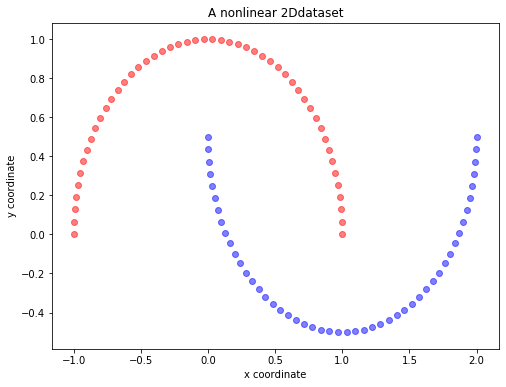

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

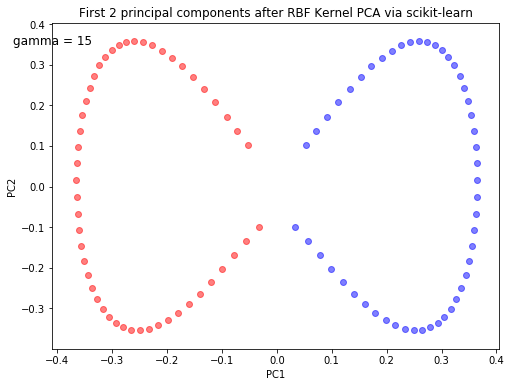

In [0]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

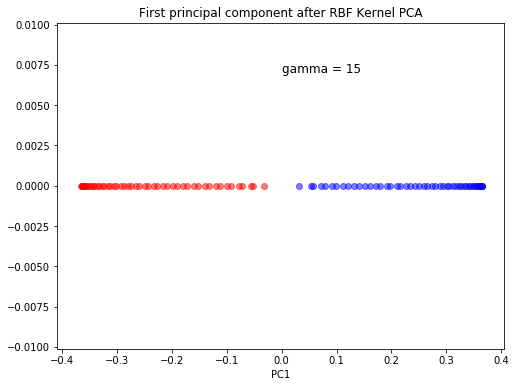

In [0]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.text(-0.00, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

#### Concentric circles

Below is a classic case of 2 concentric circles with random noise produced by Scikit-learn’s `make_circles`.

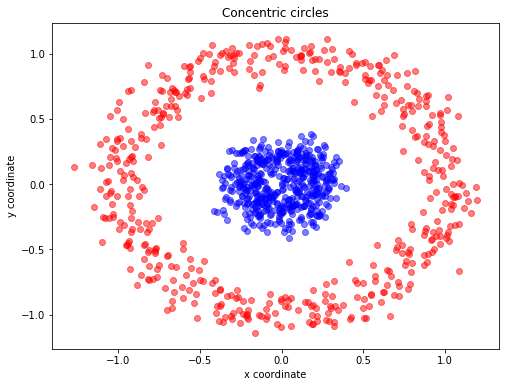

In [0]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, 
                    factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

#### Linear PCA on Concentric Circles

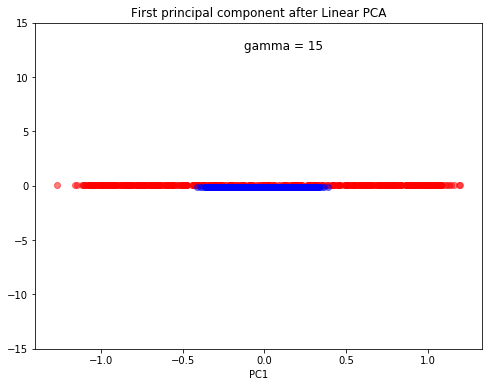

In [0]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-0.125, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

Again, the results obtained via the linear PCA approach does not produce a subspace where the 2 classes are linearly well separated.

#### Gaussian RBF kernel PCA on concentric circles

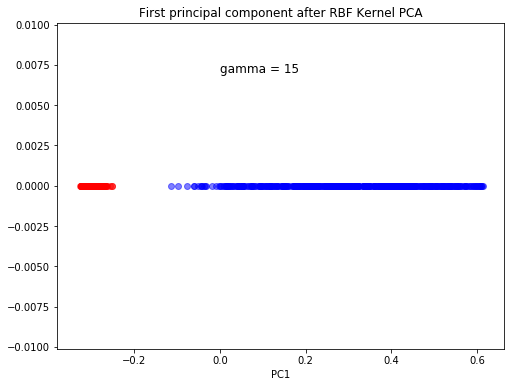

In [0]:
import warnings
warnings.simplefilter("ignore")

scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_pc = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(0.00, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

This 1-dimensional subspace obtained via Gaussian RBF kernel PCA looks much better in terms of linear class separation.

#### Swiss roll

Unrolling the Swiss roll is a more challenging task than the previous examples. 

Use the `make_swiss_roll` function to create a 3-dimensional Swiss roll.


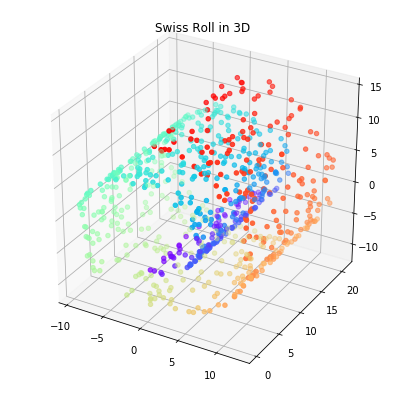

In [0]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()


#### Linear PCA on Swiss Roll

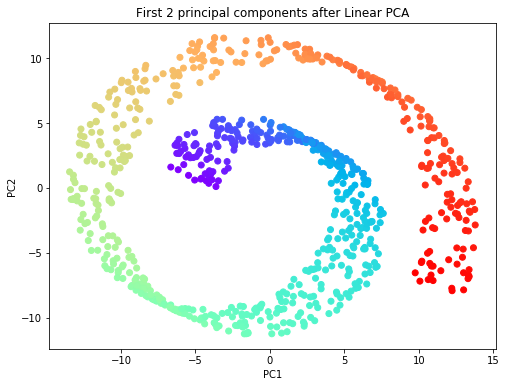

In [0]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

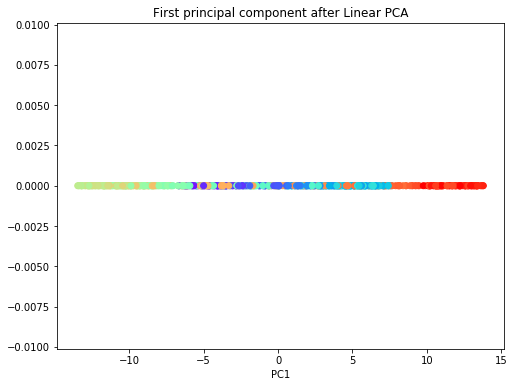

In [0]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

#### Gaussian RBF kernel PCA on Swiss Roll

Did not find a good parameter for $\gamma$ for the Gaussian RBF kernel for good linear separation of this data. 

Please try to do better.


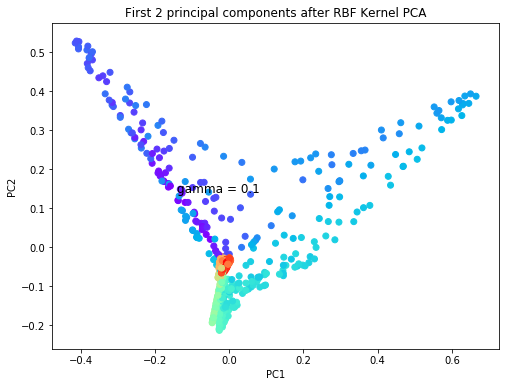

In [0]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_pc = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

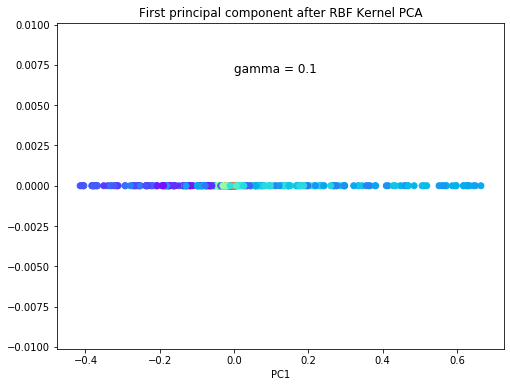

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.text(-0.00, 0.007, 'gamma = 0.1', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

In [0]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=100)
X_kpca = kpca.fit_transform(X)

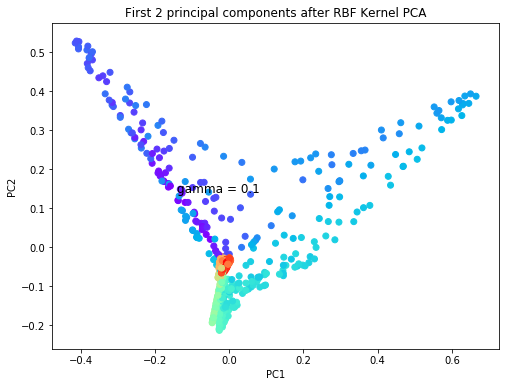

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

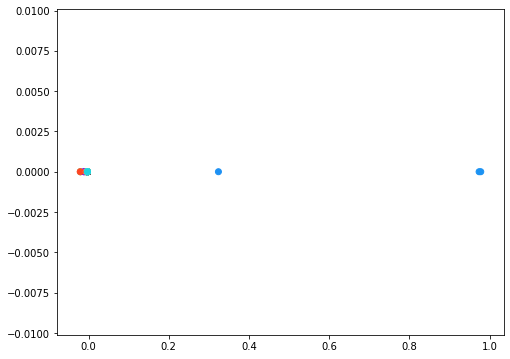

In [0]:
plt.figure(figsize=(8,6))

plt.scatter(X_kpca[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)


### Assignment: Non-linear dimensionality reduction with kernel-PCA 

One place manifold learning is often used is in understanding the relationship between high-dimensional data points. A common case of high-dimensional data is images.

The brightness of each pixel in each image defines the coordinate in that dimension.

Data Set Information: This dataset is made up of 1797 8x8 images. Each image is of a handwritten digit. In order to utilize an 8x8 figure we need to first transform it into a feature vector with length 64.

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html 

Using the notebook (DimensionalityReduction_53_1_nonlinear_kpca.ipynb):

1) Load the the digits data with Scikit-Learn 

2) Fit PCA to 64-components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

3) Identify the number of components required for ~90 explained variance (only for PCA).

4) List the top 2 components, generate a color-coded scatter plot for the first two components.

5) Repeat step 4 using Kernel-PCA with RBF, and Kernel-PCA with Poly kernels. For your kernel-PCA experiments try to identify the optimal value of gamma. 

6) Record your observations and identify your top performing model.


In [0]:
from sklearn.datasets import load_digits
import random
import pandas as pd

digits = load_digits()

data = digits['data']
data = pd.DataFrame(data)
data.head()
data.shape

# target = digits['target']

(1797, 64)

In [0]:
# PCA with 64 components:
# 2) Fit PCA to 64-components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

X = data
pca = PCA(64)
X_transform = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

import numpy as np
variable = np.cumsum(variances)
# np.sum(variable[0:3])

#adam's code

cum_var_expl = np.cumsum(pca.explained_variance_ratio_)
n_pcs_for_90 = (cum_var_expl <= 0.90).sum()
print(n_pcs_for_90) # we need 20 components to have it explain 90% of the data



20


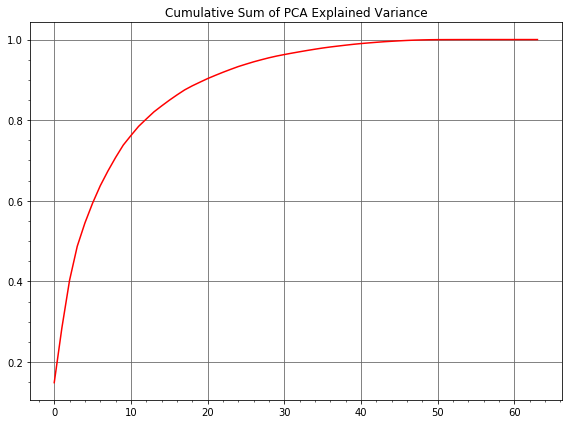

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(cum_var_expl, color='red')
plt.title('Cumulative Sum of PCA Explained Variance')
plt.tight_layout()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.show()

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [0]:
# PCA with 2 components:
X = data
pca = PCA(2)
X_pca = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

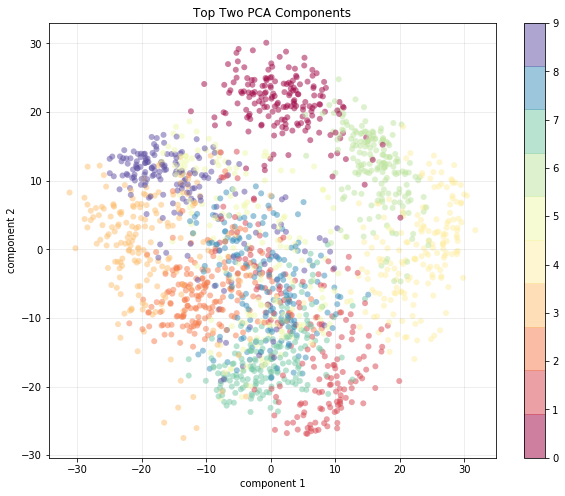

In [0]:
# The following will plot your first two components
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.title('Top Two PCA Components')
plt.colorbar();

We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear embeddings can be helpful. We can compute a Kernel PCA embedding using the same pattern shown before:

In [0]:
# Kernel PCA with 2 components:
# experiment with kernel type and gamma value
X = data
kpca = KernelPCA(2,
                 kernel='rbf',
                 gamma=10,
                 fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)


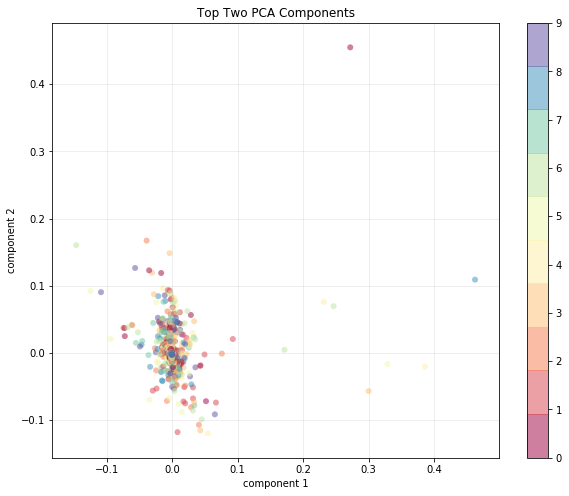

In [0]:
# This will plot your first two components
plt.figure(figsize=(10,8))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.title('Top Two Kernel PCA Components')
plt.colorbar();